In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [65]:
# Configuration of plot
plt.style.use('seaborn')
sns.set_context('talk', font_scale=1.4)
plt.rcParams['figure.figsize'] = (10, 7)

## 使用梯度下降计算一元线性回归SLR的最优参数

### 载入Boston Housing数据集，并做预处理

In [66]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target

boston_df = boston_df[['RM','LSTAT','PRICE']]
boston_df

,RM,LSTAT,PRICE
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


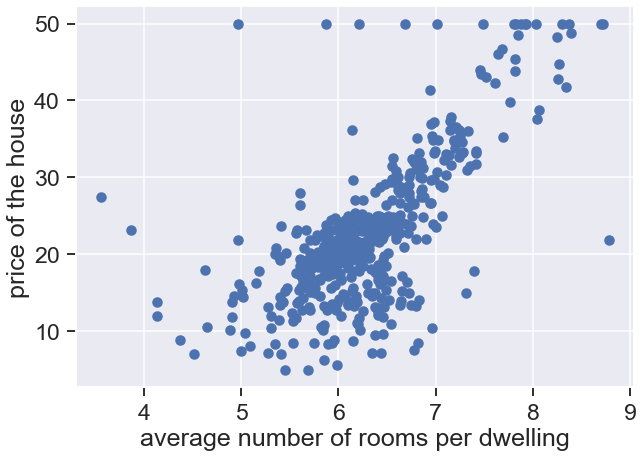

In [67]:
#RM vs. PRICE

plt.scatter(boston_df['RM'], boston_df['PRICE'])
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('price of the house');

### 首先讨论最简单情况：不考虑截距，即SLR模型为 $y = \theta x$

In [68]:
X = boston_df['RM']
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [69]:
Y = boston_df['PRICE']
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

### 方法1：使用线性回归的解析解

In [70]:
# 参考课件中线性回归的解析解（根据1D情况调整）
theta_hat = (X.T @ X)**(-1) * X.T @ Y
theta_hat

3.6533504000238812

### 方法2：绘制MSE函数，枚举可能的$\theta$取值

In [71]:
def mse_loss_slr(theta):
    yhat = theta * X
    return np.mean((Y - yhat)**2)/2

mse_loss_slr(2)

83.86207765612644

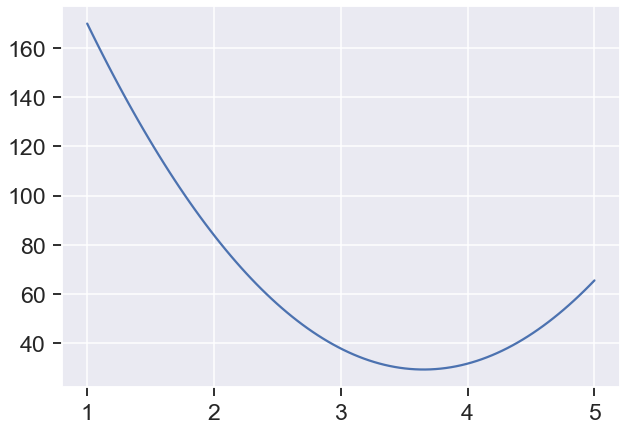

In [72]:
def plot_mse_loss():
    # 使用linspace函数在指定的间隔内返回均匀间隔的数字
    # 例：下面的语句返回1到7之间的100个数字
    theta_set = np.linspace(1, 5, 100)
    loss_set = [mse_loss_slr(theta) for theta in theta_set]
    plt.plot(theta_set, loss_set)
    axes = plt.gca()
    #axes.set_ylim([-1, 4])

plot_mse_loss()

In [73]:
# 绘制函数func上的离散点
def plot_x_on_f(func, x):
    y = func(x)
    default_args = dict(label = r'$ \theta $', zorder = 2,
                       s = 100, c = sns.xkcd_rgb['green'])
    plt.scatter([x], [y], **default_args)


# 绘制函数func上某点的切线
def plot_tangent_on_f(func, x, eps=1e-6):
    slope = (func(x+eps) - func(x-eps)) / (2*eps)
    xs = np.arange(x-1,x+1, 0.05)
    ys = func(x) + slope * (xs - x)
    plt.plot(xs, ys, zorder = 3, c=sns.xkcd_rgb['green'], linestyle='--')
    
# 绘制函数func上的一组离散点
def plot_xset_on_f(func, xset):
    yset = [func(x) for x in xset]
    default_args = dict(label = r'$ \theta $', zorder = 2,
                       s = 100, c = sns.xkcd_rgb['green'])
    plt.scatter(xset, yset, **default_args)


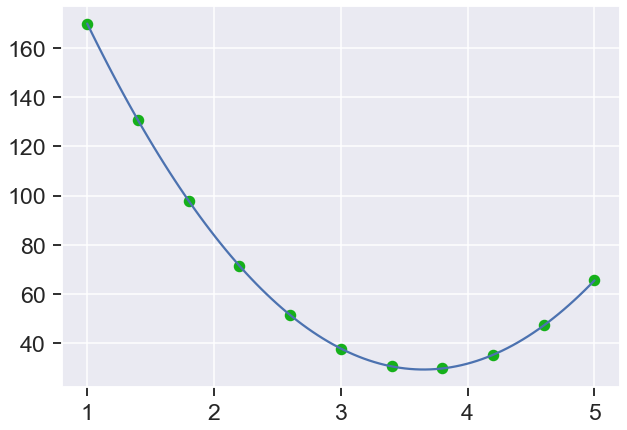

In [74]:
# 绘制函数func上的一组离散点

sparse_theta_set = np.linspace(1, 5, 11)
sparse_theta_set
plot_mse_loss()
plot_xset_on_f(mse_loss_slr, sparse_theta_set)

In [75]:
def simple_minimize(func, xset):
    y = [func(x) for x in xset]
    return xset[np.argmin(y)]

In [76]:
simple_minimize(mse_loss_slr, sparse_theta_set)

3.8000000000000003

### 方法3：使用Gradient Descent

In [77]:
#SLR的梯度向量

def gradient_slr(theta):
    res = Y - theta * X
    v = res * X
    return -np.mean(v)
    
gradient_slr(2)

-66.11636582213433

In [78]:
#梯度下降
def gradient_descent(gradient, init_guess, learn_rate, n_iter):
    guess = init_guess
    for _ in range(n_iter):
        guess = guess - learn_rate * gradient(guess)
    return guess

#梯度下降算法，参数变化的可视化
def gradient_descent_with_plot(gradient, func, init_guess, learn_rate, n_iter):
    guess = init_guess
    plot_x_on_f(func, guess)
    guesses = [init_guess]
    for i in range(n_iter):
        print("{}-th iteration: guess = {}, gradient={}".format(i, np.round(guess, 2), np.round(gradient(guess), 2)))
        guess = guess - learn_rate * gradient(guess)
        guesses.append(guess)
        plot_x_on_f(func, guess)
        #plot_tangent_on_f(arbitrary, guess)
    guesses_func = [func(guess) for guess in guesses]
    plt.plot(np.array(guesses), guesses_func, 
            zorder = 3, c=sns.xkcd_rgb['green'], linestyle='-')
    return guess

0-th iteration: guess = 1, gradient=-106.11
1-th iteration: guess = 2.06, gradient=-63.67
2-th iteration: guess = 2.7, gradient=-38.21
3-th iteration: guess = 3.08, gradient=-22.93
4-th iteration: guess = 3.31, gradient=-13.76
5-th iteration: guess = 3.45, gradient=-8.26
6-th iteration: guess = 3.53, gradient=-4.96
7-th iteration: guess = 3.58, gradient=-2.97
8-th iteration: guess = 3.61, gradient=-1.78
9-th iteration: guess = 3.63, gradient=-1.07
10-th iteration: guess = 3.64, gradient=-0.64
11-th iteration: guess = 3.64, gradient=-0.39
12-th iteration: guess = 3.65, gradient=-0.23
13-th iteration: guess = 3.65, gradient=-0.14
14-th iteration: guess = 3.65, gradient=-0.08
15-th iteration: guess = 3.65, gradient=-0.05
16-th iteration: guess = 3.65, gradient=-0.03
17-th iteration: guess = 3.65, gradient=-0.02
18-th iteration: guess = 3.65, gradient=-0.01
19-th iteration: guess = 3.65, gradient=-0.01


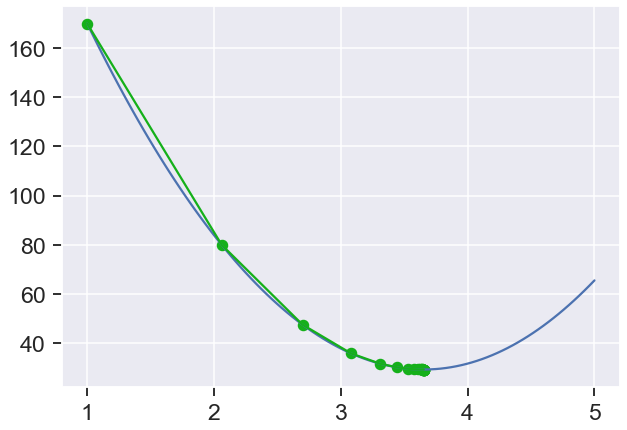

In [79]:
plot_mse_loss()
guess = gradient_descent_with_plot(gradient_slr, mse_loss_slr, 1, 0.01, 20)

In [80]:
guess

3.653253043535805

## 使用梯度下降GD求解两个参数的优化问题

* 我们对MSE优化目标做些变换：$R(\mathbb{\theta})=\frac{1}{2n}\sum_{i}^{n}{(y-f(x;\theta))^2}$

In [81]:
def mse_loss_lr(theta_vec, x, y):
    res_squred = (y - X@theta_vec)**2
    return 1 / 2 * np.mean(res_squred)

In [82]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target
boston_df['BIAS'] = 1 #加上BIAS偏置量

X = boston_df[['BIAS', 'RM']]
Y = boston_df['PRICE']
X,Y

(     BIAS     RM
 0       1  6.575
 1       1  6.421
 2       1  7.185
 3       1  6.998
 4       1  7.147
 ..    ...    ...
 501     1  6.593
 502     1  6.120
 503     1  6.976
 504     1  6.794
 505     1  6.030
 
 [506 rows x 2 columns],
 0      24.0
 1      21.6
 2      34.7
 3      33.4
 4      36.2
        ... 
 501    22.4
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: PRICE, Length: 506, dtype: float64)

In [83]:
#初始化theta及loss

theta_vec = np.array([-50,-10]).T
loss = mse_loss_lr(theta_vec, X, Y)
loss

9275.447348517782

In [84]:
num_points = 100
theta_0 = np.linspace(-60, 0,num_points)
theta_1 = np.linspace(-15, 35, num_points)
losses = [mse_loss_lr([t0, t1], X, Y) for t0 in theta_0 for t1 in theta_1]

In [85]:
#不同的theta0和theta1及其loss
def plot_mse_2d (theta_0, theta_1, losses):
    (u,v) = np.meshgrid(theta_0, theta_1)
    thetas = np.vstack((u.flatten(),v.flatten()))
    #losses = np.array([mse_loss_lr(t, X, Y) for t in thetas.T])

    loss_surface = go.Surface(x=u, y=v, z=np.reshape(losses, u.shape))

    fig = go.Figure(data=[loss_surface])
    #fig.add_trace(opt_point)
    opt_point = go.Scatter3d(x = [-50], y = [-10], z = [mse_loss_lr([-50, -10], X, Y)],
                mode = 'markers', marker=dict(size=10, color='gold'))
    fig.add_trace(opt_point)
    fig.update_layout(scene = dict(
        xaxis_title = "theta0",
        yaxis_title = "theta1",
        zaxis_title = "MSE"))
    fig.show()
    

plot_mse_2d(theta_0, theta_1, losses)

In [86]:
#解析解

theta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
theta_hat

0   -34.670621
1     9.102109
dtype: float64

In [87]:
#解析解对应的loss
#mse_loss_lr([-46.67164402,  10.98373657], X, Y)
mse_loss_lr([-34.67164402,  9.102109], X, Y)

21.800276408977478

In [88]:
#计算某个theta对应的梯度

def gradient_mse_lr (x, y, theta_vec):
    res = x@theta_vec - y
    grad = x.T@res / y.shape[0]
    return grad

gradient_mse_lr(X,Y,[-50, -10])

BIAS   -135.37915
RM     -860.21998
dtype: float64

In [89]:
#优化的梯度下降算法

def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06,
    dtype="float64"
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    if x.shape[0] != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)
    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_).T
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Recalculating the difference
        diff = -learn_rate * np.array(gradient(x, y, vector), dtype_)

        # Checking if the absolute difference is small enough
        if np.all(np.abs(diff) <= tolerance):
            break
        # Updating the values of the variables
        vector = vector + diff
        #print(vector)

    return vector if vector.shape else vector.item()

In [90]:
import time

In [91]:
#迭代20次

init_guess = [-40, 5]
time_start = time.time()
theta_hat = gradient_descent(gradient_mse_lr, X, Y, init_guess, learn_rate=0.02, n_iter=20, tolerance=1e-8)
time_end = time.time()
#theta_hat, (time_end-time_start)
theta_hat, mse_loss_lr(theta_hat, X, Y), (time_end-time_start)

(array([-39.22021314,   9.81732797]),
 21.927788280274775,
 0.0020055770874023438)

In [92]:
#迭代1000次

init_guess = np.array([-40, 5])
time_start = time.time()
theta_hat = gradient_descent(gradient_mse_lr, X, Y, init_guess, learn_rate=0.02, n_iter=1000, tolerance=1e-8)
time_end = time.time()
theta_hat, mse_loss_lr(theta_hat, X, Y), (time_end-time_start)

(array([-38.26491079,   9.66714959]), 21.879861333188863, 0.034906625747680664)

In [93]:
#随机梯度下降算法

def sgd(
    gradient, x, y, start, learn_rate=0.1, batch_size=1, n_iter=50,
    tolerance=1e-06, dtype="float64", random_state=None
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)
    
    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]
            y_batch = y_batch[:,0]
            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break
            # Updating the values of the variables
            vector = vector + diff

    return vector if vector.shape else vector.item()

In [94]:
#迭代100次

init_guess = [-40, 5]
time_start = time.time()
theta_hat = sgd(gradient_mse_lr, X, Y, init_guess, learn_rate=0.02, n_iter=100, tolerance=1e-8, batch_size = 10)
time_end = time.time()

theta_hat, mse_loss_lr(theta_hat, X, Y), (time_end-time_start)

(array([-35.87360882,   9.39634693]), 22.030384363273612, 0.260333776473999)